# Шаг 1
(Балл - 0.2) Необходимо скачать CSV-файл — «final_transactions.csv», создать таблицу transaction_bd со всеми полями, загрузить данные из файла в таблицу и оставить таблицу со структурой:

- (0, 'TX_DATETIME', 'NUMERIC', 0, None, 0) - время транзакций
- (1, 'CUSTOMER_ID', 'INTEGER', 0, None, 0) - клиент
- (2, 'TX_AMOUNT', 'REAL', 0, None, 0) - сумма транзакций

Комментарий: Можно оставить все 5 полей, но запросы будут выполняться чуть дольше.

In [1]:
import sqlite3 
from sqlite3 import Error 
import pandas as pd

In [2]:
def sql_connection():     
    try:         
        con = sqlite3.connect('HW_2_db.db')         
        return con     
    except Error:         
        print(Error) 

In [3]:
con =  sql_connection()

In [4]:
transact = pd.read_csv('data/final_transactions.csv')

In [5]:
transact

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
0,0,2023-01-01 00:00:31,596,3156,533.07
1,1,2023-01-01 00:02:10,4961,3412,808.56
2,2,2023-01-01 00:07:56,2,1365,1442.94
3,3,2023-01-01 00:09:29,4128,8737,620.65
4,4,2023-01-01 00:10:34,927,9906,490.66
...,...,...,...,...,...
1048570,1048570,2023-04-20 10:07:13,2380,3780,325.64
1048571,1048571,2023-04-20 10:07:28,738,5151,20.38
1048572,1048572,2023-04-20 10:07:33,1000,5417,182.79
1048573,1048573,2023-04-20 10:07:39,3028,6439,455.44


In [6]:
transact.to_sql('transaction_bd', con, if_exists='replace', index=False, dtype={'TX_DATETIME':'NUMERIC'})

1048575

In [7]:
meta = con.execute("PRAGMA table_info('transaction_bd')")
for r in meta:
    print(r)

(0, 'TRANSACTION_ID', 'INTEGER', 0, None, 0)
(1, 'TX_DATETIME', 'NUMERIC', 0, None, 0)
(2, 'CUSTOMER_ID', 'INTEGER', 0, None, 0)
(3, 'TERMINAL_ID', 'INTEGER', 0, None, 0)
(4, 'TX_AMOUNT', 'REAL', 0, None, 0)


In [8]:
cursorObj = con.cursor()     
cursorObj.execute('ALTER TABLE transaction_bd DROP COLUMN TRANSACTION_ID')     
con.commit() 

In [9]:
cursorObj = con.cursor()     
cursorObj.execute('ALTER TABLE transaction_bd DROP COLUMN TERMINAL_ID')     
con.commit() 

In [10]:
meta = con.execute("PRAGMA table_info('transaction_bd')")
for r in meta:
    print(r)

(0, 'TX_DATETIME', 'NUMERIC', 0, None, 0)
(1, 'CUSTOMER_ID', 'INTEGER', 0, None, 0)
(2, 'TX_AMOUNT', 'REAL', 0, None, 0)


# Шаг 2
(Балл - 0.1 за каждый пункт) Написать следующие запросы к таблице transaction_bd:

- A. Вывести всех клиентов, у которых сумма транзакций больше 700000 за весь период (сортируя клиентов по возрастанию);
- B. Вывести всех клиентов, у которых сумма транзакций больше 200000 за период 01.01.2023 - 13.01.2023 (сортируя клиентов по возрастанию);
- C. Вывести тех клиентов, у которых id начинается с 4 и количество транзакций за весь период более 444;
- D. Создать флаг доходности клиентов по логике:
- 1. Если сумма транзакций не более 50000, тогда вывести 'низкая доходность';
- 2. Если сумма транзакций больше 50000 и не более 10000 тогда вывести 'средняя доходность';
- 3. Если сумма транзакций больше 100000 тогда вывести 'высокая доходность'.
- E. Посмотреть количество клиентов с каждым видом доходности (из пункта 2.d);
- F. Вывести сумму транзакций за каждый день (сортируя дни по возрастанию).

In [11]:
df = pd.read_sql('SELECT * FROM transaction_bd', con)
df

,TX_DATETIME,CUSTOMER_ID,TX_AMOUNT
0,2023-01-01 00:00:31,596,533.07
1,2023-01-01 00:02:10,4961,808.56
2,2023-01-01 00:07:56,2,1442.94
3,2023-01-01 00:09:29,4128,620.65
4,2023-01-01 00:10:34,927,490.66
...,...,...,...
1048570,2023-04-20 10:07:13,2380,325.64
1048571,2023-04-20 10:07:28,738,20.38
1048572,2023-04-20 10:07:33,1000,182.79
1048573,2023-04-20 10:07:39,3028,455.44


In [12]:
df.CUSTOMER_ID.value_counts()

2891    477
2580    464
1953    455
2932    454
3864    453
       ... 
1880      1
1942      1
4866      1
3801      1
1095      1
Name: CUSTOMER_ID, Length: 4986, dtype: int64

In [13]:
# A. Вывести всех клиентов, у которых сумма транзакций больше 700000 за весь период (сортируя клиентов по возрастанию);
query_1  = """
SELECT CUSTOMER_ID
FROM transaction_bd
GROUP BY CUSTOMER_ID
HAVING sum(TX_AMOUNT)>700000 
ORDER BY CUSTOMER_ID;
"""
df1 = pd.read_sql(query_1, con)
df1

,CUSTOMER_ID
0,389
1,2249
2,2891
3,3116
4,4163


In [14]:
# B. Вывести всех клиентов, у которых сумма транзакций больше 200000 за период 01.01.2023 - 13.01.2023 
# (сортируя клиентов по возрастанию);
query_2  = """
SELECT CUSTOMER_ID 
FROM transaction_bd 
WHERE TX_DATETIME BETWEEN '2023-01-01 00:00:00' AND '2023-01-13 00:00:00' 
GROUP BY CUSTOMER_ID 
HAVING sum(TX_AMOUNT)>200000 
ORDER BY CUSTOMER_ID;
"""
df2 = pd.read_sql(query_2, con)
df2

,CUSTOMER_ID
0,1918
1,3406
2,3833
3,4252


In [15]:
# C. Вывести тех клиентов, у которых id начинается с 4 и количество транзакций за весь период более 444;
query_3  = """
SELECT CUSTOMER_ID
FROM transaction_bd 
GROUP BY CUSTOMER_ID 
HAVING count(TX_AMOUNT)>444 AND CUSTOMER_ID LIKE '4%';
"""
df3 = pd.read_sql(query_3, con)
df3

,CUSTOMER_ID
0,4231
1,4539
2,4661


In [16]:
# D. Создать флаг доходности клиентов по логике:
#   Если сумма транзакций не более 50000, тогда вывести 'низкая доходность';
#   Если сумма транзакций больше 50000 и не более 10000 тогда вывести 'средняя доходность';
#   Если сумма транзакций больше 100000 тогда вывести 'высокая доходность'.
query_4  = """
SELECT CUSTOMER_ID,
CASE
    WHEN sum(TX_AMOUNT) <= 50000
        THEN 'низкая доходность'
    WHEN sum(TX_AMOUNT) > 50000 and sum(TX_AMOUNT) <= 100000
        THEN 'средняя доходность'
    WHEN sum(TX_AMOUNT) > 100000 
        THEN 'высокая доходность'
END AS REVENUE_FLAG
FROM transaction_bd 
GROUP BY CUSTOMER_ID;
"""
df4 = pd.read_sql(query_4, con)
df4

,CUSTOMER_ID,REVENUE_FLAG
0,0,высокая доходность
1,1,высокая доходность
2,2,высокая доходность
3,3,низкая доходность
4,4,высокая доходность
...,...,...
4981,4995,высокая доходность
4982,4996,низкая доходность
4983,4997,высокая доходность
4984,4998,высокая доходность


In [17]:
# E. Посмотреть количество клиентов с каждым видом доходности (из пункта 2.d);
query_5  = """
SELECT REVENUE_FLAG, COUNT(CUSTOMER_ID)
FROM(SELECT CUSTOMER_ID,
CASE
    WHEN sum(TX_AMOUNT) <= 50000
        THEN 'низкая доходность'
    WHEN sum(TX_AMOUNT) > 50000 and sum(TX_AMOUNT) <= 100000
        THEN 'средняя доходность'
    WHEN sum(TX_AMOUNT) > 100000 
        THEN 'высокая доходность'
END AS REVENUE_FLAG
FROM transaction_bd 
GROUP BY CUSTOMER_ID)
GROUP BY REVENUE_FLAG;
"""
df5 = pd.read_sql(query_5, con)
df5

,REVENUE_FLAG,COUNT(CUSTOMER_ID)
0,высокая доходность,2167
1,низкая доходность,1812
2,средняя доходность,1007


In [18]:
# F. Вывести сумму транзакций за каждый день (сортируя дни по возрастанию).
query_6  = """
SELECT date(TX_DATETIME) date, sum(TX_AMOUNT) sum_amount
FROM transaction_bd
GROUP BY date(TX_DATETIME)
ORDER BY date(TX_DATETIME);
"""
df6 = pd.read_sql(query_6, con)
df6

,date,sum_amount
0,2023-01-01,4827656.26
1,2023-01-02,4862551.41
2,2023-01-03,5058973.71
3,2023-01-04,4938142.47
4,2023-01-05,5002954.23
...,...,...
105,2023-04-16,5299386.81
106,2023-04-17,5100973.31
107,2023-04-18,5233557.39
108,2023-04-19,5194846.44


# Шаг 3
(Балл - 0.2) Подготовить дашборд с помощью Dash по пункту 2.f, включив туда графики bar и histogram; вставить в конце ноутбука скрин графиков из дашборда.

In [ ]:
from dash import Dash, html, dcc
import plotly.express as px

app = Dash()

fig1 = px.bar(df6, x="date", y="sum_amount", title = 'Зависимость суммы транзакций от даты')

fig2 = px.histogram(df6, x="sum_amount", title = 'Распределение частоты появления разных сумм')



app.layout = html.Div(children=[
    html.Div(children='Сумма транзакций за каждый день'),
    dcc.Graph(
        id='example-graph',
        figure=fig1
    ),
    html.Div(children='Распределение частоты появления разных сумм'),
    dcc.Graph(
        id='example-graph1',
        figure=fig2
    )
])

app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit


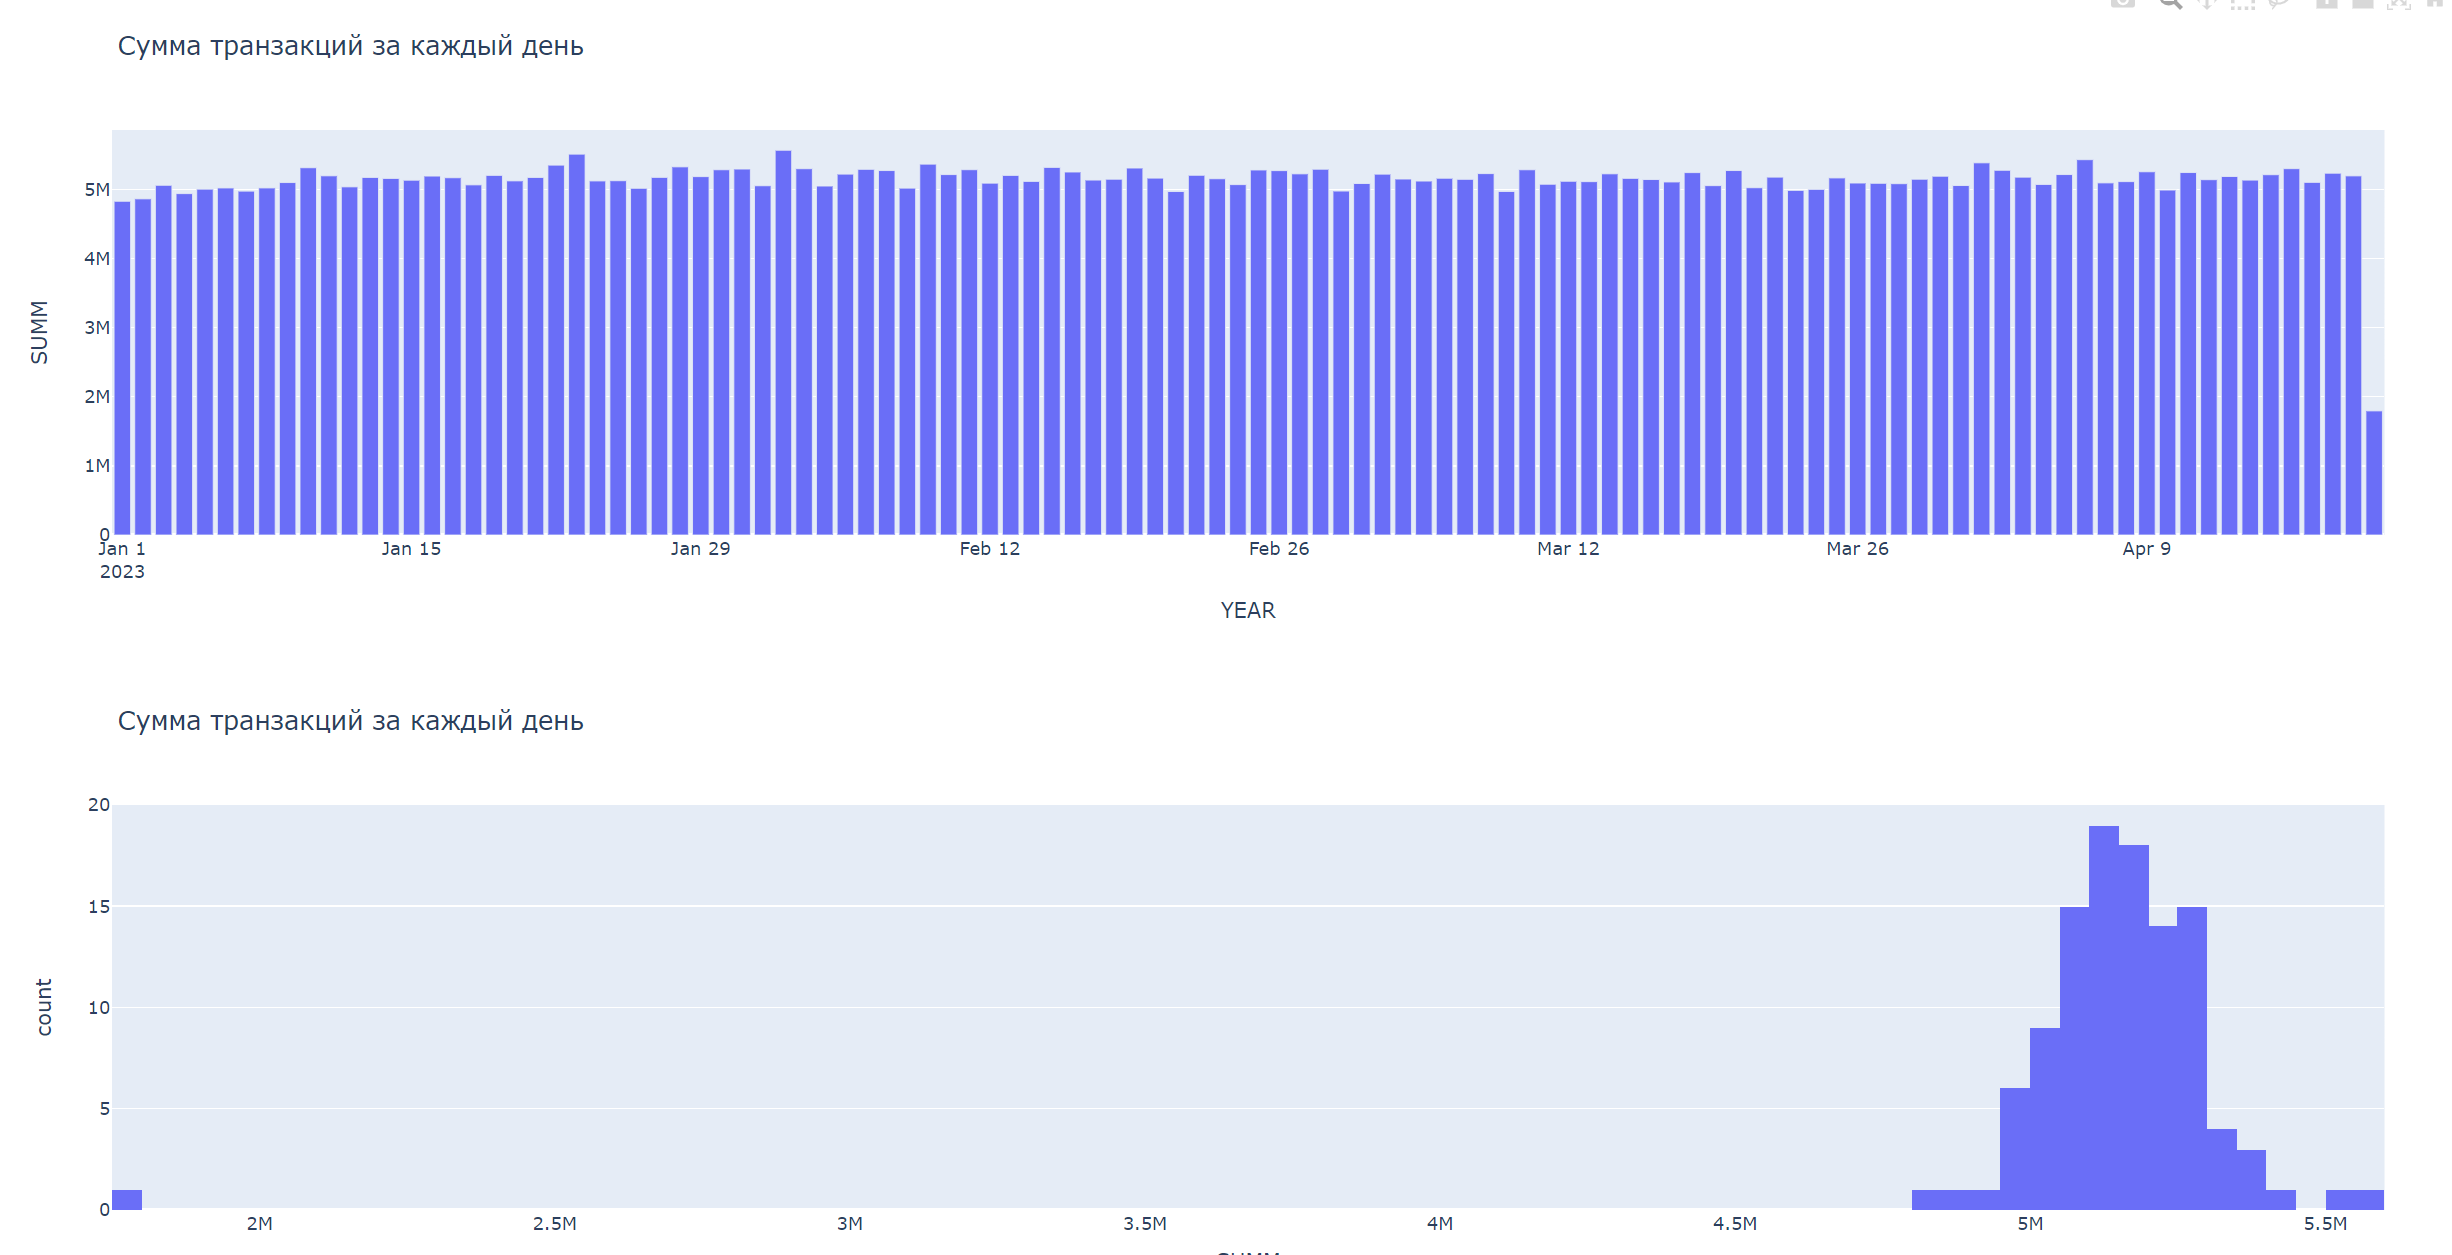